In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Вот так можно сгенерировать выборку из нормально распределённой случайной величины с параметрами $\mu=2.0$ и $\sigma=0.5$:

In [2]:
mu = 0.0
sigma = 1

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10)

array([ 0.25346298,  0.00853513, -0.23092031, -2.08027795,  1.59056679,
        1.73559398, -0.05114047, -0.4859825 , -0.01347999, -0.71069749])

Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.

Следующая функция возвращает значение функции распределения нормальной случайной величины в точке, соответствующей её аргументу:

In [3]:
norm_rv.cdf(2)-norm_rv.cdf(-2)

0.9544997361036416

Построим график функции распределения:

Text(0.5,0,'$x$')

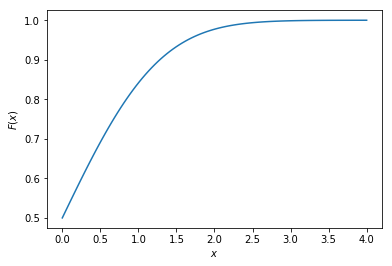

In [4]:
x = np.linspace(0,4,100)
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [5]:
norm_rv.pdf(0)

0.3989422804014327

Построим график функции плотности вероятности:

Text(0.5,0,'$x$')

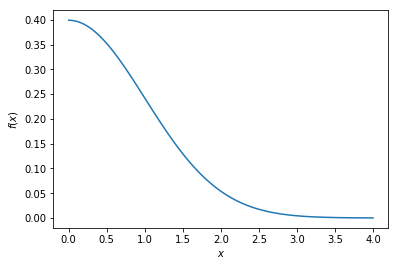

In [6]:
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

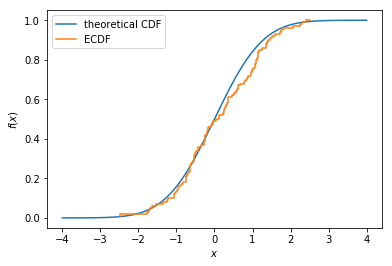

In [7]:
x = np.linspace(-4,4,500)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Text(0.5,0,'$x$')

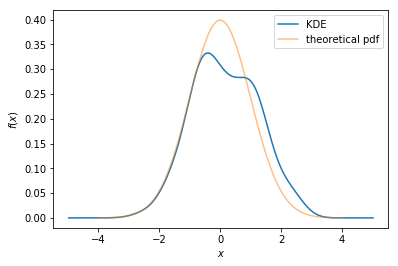

In [8]:
#Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

In [9]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([2.45945726, 1.35354388, 1.52242008, 2.64382011, 1.03445395,
       3.19587781, 1.49509236, 1.16152057, 2.57968082, 1.27248938])

А так — вычислять значения функций распределения и плотностей:

Text(0.5,0,'$x$')

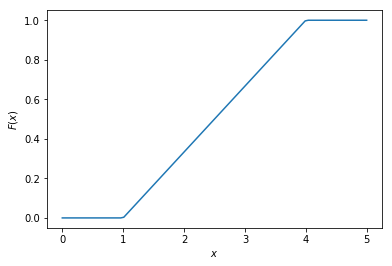

In [10]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

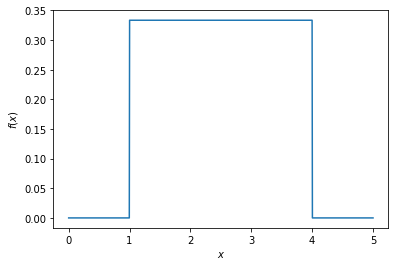

In [11]:
x = np.linspace(0,5,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Распределение Бернулли

Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [12]:
bernoulli_rv = sts.bernoulli(0.7)

bernoulli_rv.rvs(10)

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

# Биномиальное распределение

Генерация выборок из биномиального распределения:

In [13]:
binomial_rv = sts.binom(20, 0.7)
binomial_rv.rvs(10)

array([13, 11, 16, 13, 15, 13, 16, 13, 14, 11])

Первый аргумент функции binom — значение параметра $n$, второй — параметра $p$.

Функция распределения:

Text(0.5,0,'$x$')

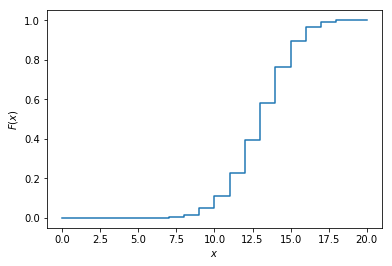

In [14]:
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности ```pmf``` для дискретных случайных величин заменяет функцию плотности ```pdf```:

Text(0.5,0,'$x$')

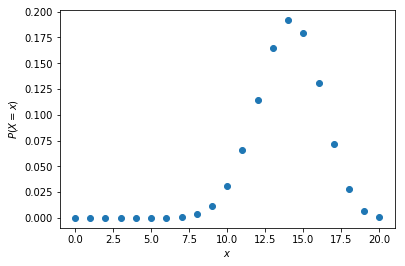

In [15]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

Text(0.5,0,'$x$')

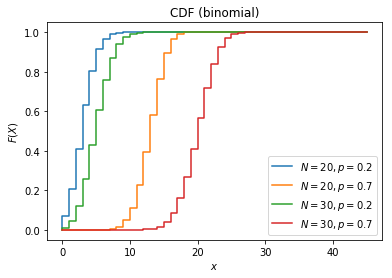

In [16]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

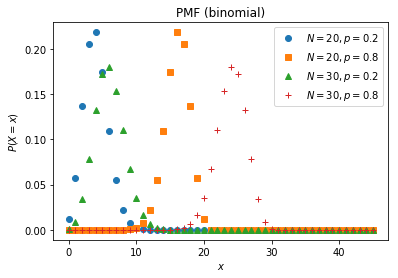

In [17]:
x = np.linspace(0,45,46)
symbols = iter(['o', 's', '^', '+'])
for N in [20, 30]:
    for p in [0.2, 0.8]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.plot(x, pmf, next(symbols), label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("PMF (binomial)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Распределение Пуассона

Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [18]:
poisson_rv = sts.poisson(5)
poisson_rv.rvs(10)

array([6, 2, 2, 5, 3, 7, 6, 4, 7, 6])

Text(0.5,0,'$x$')

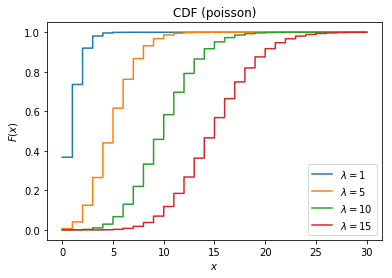

In [19]:
x = np.linspace(0,30,5000)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$\lambda=%s$" % l)
plt.legend()
plt.title("CDF (poisson)")

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

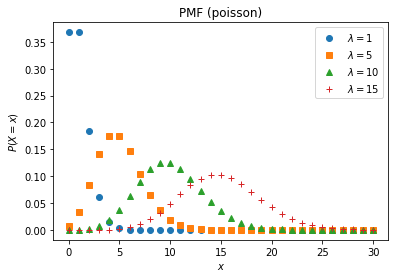

In [20]:
x = np.linspace(0,30,31)

symbols = iter(['o', 's', '^', '+'])
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
plt.legend()
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Дискретное распределение общего вида

Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей и использовать функцию ```numpy.random.choice```:

In [21]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 10, p=probabilities)

array([ 5,  5,  5, 12,  5,  5,  5,  5,  5,  5])

In [22]:
#Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.
from collections import Counter
sample = norm_rv.rvs(100)
c = Counter(sample)
c.items()
print({k: v/100.0 for k, v in c.items()})

{-1.0665360272171829: 0.01, 1.098004702874223: 0.01, -2.5189098109335424: 0.01, 0.9570729120389114: 0.01, 0.2966738237613818: 0.01, -0.9897951058865487: 0.01, -1.0813566055113648: 0.01, -0.09303735739895164: 0.01, 0.6012912947155403: 0.01, -0.08745201325445959: 0.01, 0.563301048021068: 0.01, -0.18167573167920592: 0.01, -0.991139473062239: 0.01, -1.2234071707348573: 0.01, 0.3623235725562781: 0.01, -1.085257718516708: 0.01, -0.36008953500103785: 0.01, -0.19731707077177002: 0.01, 0.23379777215424632: 0.01, 1.2837186559580631: 0.01, -2.2912770263153988: 0.01, 1.7909785169586445: 0.01, -0.16160987487863557: 0.01, 0.9569184607901785: 0.01, 0.7067489239630538: 0.01, 0.1498992304350196: 0.01, -0.21586377698137846: 0.01, -0.110734124967282: 0.01, 0.2594781116169697: 0.01, 0.48975549120916034: 0.01, 0.4640047177676782: 0.01, 0.04672398025009441: 0.01, 1.3450053490757103: 0.01, -0.34800501439051457: 0.01, 0.21450302488284284: 0.01, -2.072544133944128: 0.01, -2.2207438846583494: 0.01, -0.052855775

# Другие распределения

Существует большое количество других стандартных семейств распределений, многие из которых также можно генерировать в Питоне. 
Например, распределение хи-квадрат $\chi^2_k$, имеющее наутральный параметр $k$, который называется числом степеней свободы:

Text(0.5,1,'CDF ($\\chi^2_k$)')

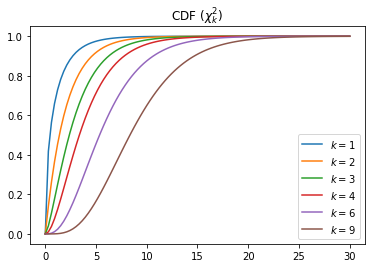

In [23]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

Text(0.5,1,'PDF ($\\chi^2_k$)')

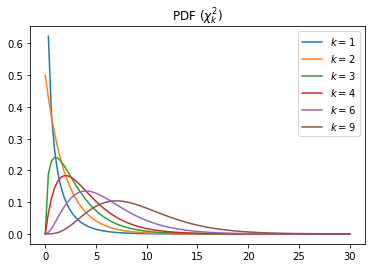

In [24]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

# sample_distribution_evaluation

In [4]:
sample = np.random.choice([1,2,3,4,5,6], 100)
#Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({3: 20, 4: 18, 5: 17, 1: 17, 2: 16, 6: 12})
Вероятности выпадений каждой из сторон:
{4: 0.18, 2: 0.16, 5: 0.17, 3: 0.2, 1: 0.17, 6: 0.12}


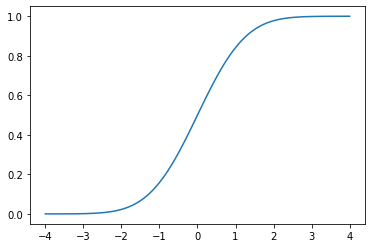

In [5]:
#Непрерывное распределение¶
#Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)


#Эмпирическая функция распределения для полученной выборки:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

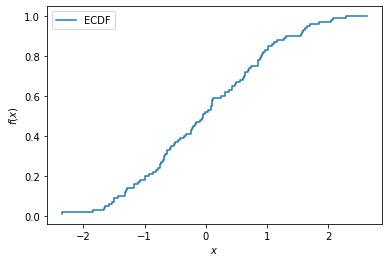

In [6]:

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()


C:\Users\Kostya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, '$x$')

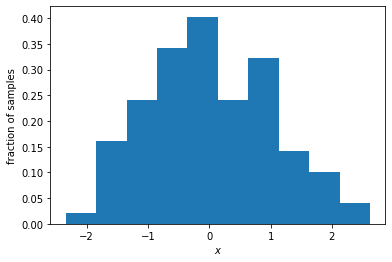

In [7]:

plt.hist(sample, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')


C:\Users\Kostya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, '$x$')

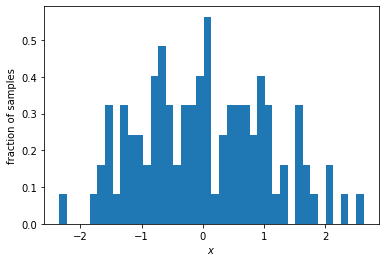

In [8]:




plt.hist(sample, bins=40, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

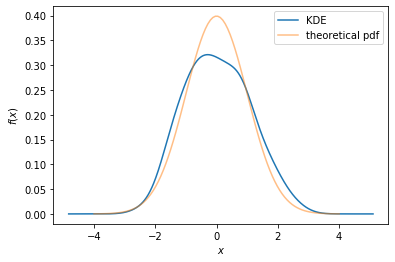

In [9]:
#Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:
# для построения используем библиотеку Pandas:
import pandas as pd
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')
# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

